# Comparison of Solutions for Markov Decision Processes

### Introduction

Markov Decision Processes (MDPs) provide a mathematical formulation for stochastic sequential decision making. Stochastic sequential decision making has roots in many fields [Puterman] 

In this project, we will be comparing a variety of classic dynamic programming and linear programming methods. From the dynamic programming realm, the solution methods are:
-  Value Iteration
-  Policy Iteration

and for linear programming methods:
-  First order methods
    -  Projected Gradient Method
    -  Projected Accelerated Gradient Method
-  Interior point methods
-  Simplex methods
-  CVXPY toolset (SCS, ECOS, CVXOPT)


#### Problem Formulation
$\textbf{Definition 1:}$ A Markov decision process (MDP) is a tuple $\mathcal{M}=(S,s_0,A,P)$ where $S$ is the finite set of states, i.e. $|S|=n$, $s_0\in S$ is the initial state, $A$ is the finite set of actions, i.e. $|A|=a$, and $P: S\times A \rightarrow[0,1]^{n}$ is the transition function. For any given $(s,a)$, $P$ satisfies $\sum_{t\in S}P(t| s,a)=1$ and $P(t | s,a)\geq 0$. Assume for simplicity that all actions are available in all states.

An infinite run from the initial state $s_0$ is a sequence $\rho$$=$$s_0a_0s_1a_1s_2...$ of states and actions such that for all $k\geq 0$, we have $P(s_{k+1}|s_k,a_k)$$>$$0$. A policy specifies a procedure for action selection in each state depending on the history of states and actions. A deterministic policy is a function $\pi : S \rightarrow A$ that maps the set of states into the set of available actions for the input state. For a given MDP $\mathcal{M}$, we denote the set of all possible deterministic policies by $\Pi(\mathcal{M})$.

To define a reward maximization problem, we relate each state transition with a real valued reward, using the reward function $r : S\times A\times S \rightarrow \mathbb{R}$. Then, the expected total reward of an infinite horizon decision process following the policy $\pi$ is given as follows,

$\begin{align}
V^{\pi}(s)=\lim_{N\rightarrow \infty}\mathbb{E}\Big[\sum_{k=0}^{N-1}\alpha^kr(s_i,\pi(s),s_{i+1})\Big| i_0=s_0\Big]
\end{align}$ $\forall s\in S$

where $V^{\pi}(s)$ is the value of state $s$ under the policy $\pi$. 


Suppose that our aim is to find a policy that maximizes the expected total reward. The Bellman equation and optimality conditions provide the following formulation to compute maximum values for states and corresponding actions which achieves the maximum reward values,

$\begin{align}
V^{\star}(s)&=\max_{a}\sum_{t\in S}P(t|s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big]\\
\pi^{\star}(s)&=\arg\max_{a}\sum_{t\in S}P(t|s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big]\\
\end{align}$

Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^n$ be an operator defined as,

$(TV)(s)=\max_{a}\sum_{t\in S}P(t|s,a)\Big[r(s,a,t)+\alpha V(t)\Big]$.

Then, the optimality condition is given by $TV^{\star}=V^{\star}$. Additionally, from well known results, $T$ is a monotone operator and a contraction mapping. Hence, it satisfies that (i) for any $V$ satisfying $V\geq TV$, $V\geq V^{\star}$ where inequalities are elementwise, (ii) it has a unique solution to $V^{\star}=TV^{\star}$ . Using this fact, and defining $r(s,a)=\sum_{t\in S}P(t|s,a)r(s,a,t)$, we can formulate finding the maximum expected reward problem as a linear program as following,

$\begin{align}
\min \ \ &c^TV\\
\text{subject to}: \ \ & V(s)\geq r(s,a)+\alpha\sum_{t\in S}P(t|s,a)V(t)
\end{align}$

where $c\in\mathbb{R}_{++}^n$. Having $c>0$ for each state ensures the uniqueness of the solution. Let $P_{a_1}\in[0,1]^{n\times n}$ be a transition matrix for action $a_1$. We define the following matrices,

$\begin{align}
A=\begin{bmatrix}
I_{n\times n}-\alpha P_{a_1}\\
I_{n\times n}-\alpha P_{a_2}\\
...\\
I_{n\times n}-\alpha P_{a_a}
\end{bmatrix}
\end{align}$ ,
$\begin{align}
b=\begin{bmatrix}
r(s_1,a_1),&
r(s_2,a_1),&
...,&
r(s_n,a_1),&
r(s_1,a_2),&
...,&
r(s_n,a_2),&
...,&
r(s_1,a_a),&
...,&
r(s_n,a_a)
\end{bmatrix}^T
\end{align}$.

Then the problem becomes,

$\begin{align}
\min \ \ &c^TV\\
\text{subject to}: \ \ & AV\geq b
\end{align}$

#### Dual Program

The Lagrangian for the primal problem is given by,

$\begin{align}
\mathcal{L}(V,\lambda)=c^TV+\lambda^T(b-AV)
\end{align}$
where the dual variable $\lambda\in\mathbb{R}^{na}$. Hence, the dual problem is,

$\begin{align}
\max & \ \ \lambda^Tb\\
\text{Subject to} :&\ \  A^T\lambda-c=0\\
&\ \  \lambda\geq 0
\end{align}$,
or writing explicitly,  


$\begin{align}
\max & \ \ \sum_{a\in A}\sum_{s\in S}\lambda(s,a)b(s,a)\\
\text{Subject to} :&\ \  \sum_{a\in A}\lambda(s,a)-\alpha\sum_{t\in S}\sum_{a\in A}P(s|t,a)\lambda(t,a)=c(s)\ \ \ \forall \ \ s\in S\\
&\ \  \lambda(s,a)\geq 0\ \ \ \forall s\in S, \ \ a\in A
\end{align}$

where $\lambda(s,a)$ variables intuitively represent the expected residence time in a state action pair. Although the deterministic policies are at least as good as randomized policies for examples we are going to use, note that the use of dual program provides an efficient way to extract the randomized policies from the output. Using the dual program, the optimal policy for each state can be obtained by using,

$\begin{align}
P(a| s)= 
\begin{cases} \frac{\lambda(s,a)}{\sum_{a\in A}\lambda(s,a)}& \text{if} \sum_{a\in A}\lambda(s,a)\neq 0\\
\text{arbitrary} & \text{if} \sum_{a\in A}\lambda(s,a)= 0\end{cases}
\end{align}$

In [7]:
import numpy as np
import math as m
import numpy.linalg as la
from scipy.optimize import linprog
import numpy.random as rn
import matplotlib.pyplot as plt
from cvxpy import *
import cvxpy as cvx

Below is an example of a candidate Grid World that will be solved using the above methods.

## Generating the MDP
We will use grid world examples to compare the performance of various methods in terms of scalability and required number of iterations to satisfy the desired error bounds on the state values. The following code generates an (n,m) grid world and allows the agent to choose between five possible actions in each state, namely left, right, up, down and stay. Once the agent chooses an action, the next state is determined stochastically.
#### Grid World Transitions

In [8]:
# This is the grid world generator with 5 possible actions for the agent i.e. (left,right,up,down,loop).
# Inputs:
# Row: Number of rows of the grid world
# Col: Number of columns of the grid world
# Prob: Probability of taking the desired action
# Output:
# P_0: Transition matrix with dimensions 5 x (Row x Col) x (Row x Col)  

# When an action is chosen by the agent, it is performed with probability Prob and the remaining (1-Prob) probability
# is distributed among other actions. This property is included to introduce stochasticity.
# Output matrix is formed in a way that 0th row of the matrix represent transitions from the  bottom left corner 
# of the grid world. Similarly, the last row is for the upper right corner ((Row x Col)th grid).

def Grid_world(Row,Col,Prob):
    State=Row*Col
    Actions=5
    np.random.seed(0)
    prob=Prob
    P_0=np.zeros((Actions,State,State))
    #action left
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[0,i,i]=prob+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i+Col]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[0,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[0,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i+Col]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i-Col]=(1-prob)/4
            else:
                P_0[0,i,i]=(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i-Col]=(1-prob)/4
                P_0[0,i,i+Col]=(1-prob)/4
    # action right
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i+Col]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[1,i,i]=prob+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i+Col]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[1,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[1,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i-Col]=(1-prob)/4
            else:
                P_0[1,i,i]=(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i-Col]=(1-prob)/4
                P_0[1,i,i+Col]=(1-prob)/4
    # action up
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                    P_0[2,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                if i==State-Col:
                    P_0[2,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                    P_0[2,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                if i==State-1:
                    P_0[2,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i+Col]=prob
            elif i>(Row-1)*Col and i<State-1:
                P_0[2,i,i]=prob+(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i-Col]=(1-prob)/4
            else:
                P_0[2,i,i]=(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i-Col]=(1-prob)/4
                P_0[2,i,i+Col]=prob
    # action down
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
                if i==0:
                    P_0[3,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
                if i==Col-1:
                    P_0[3,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
            elif i>0 and i<Col-1:
                P_0[3,i,i]=prob+(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i-Col]=prob
            else:
                P_0[3,i,i]=(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i-Col]=prob
                P_0[3,i,i+Col]=(1-prob)/4
    # action loop
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[4,i,i]=prob+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[4,i,i]=prob+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[4,i,i]=prob+(1-prob)/4
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[4,i,i]=prob+(1-prob)/4
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i-Col]=(1-prob)/4
            else:
                P_0[4,i,i]=prob
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i-Col]=(1-prob)/4
                P_0[4,i,i+Col]=(1-prob)/4
    return P_0

#### Problem Formulation and Constraints for the Linear Program

In [9]:
  def example(rows,columns,prob,discount,tolerance):
    States=rows*columns
    P_0=Grid_world(rows,columns,prob)
    A=np.zeros((5*States,States)) # 5 is number of actions !
    b=np.zeros((5*States,1))
    # initial distributions USE 1 for each state!
    c=np.ones(States)
    # Constraints  Ax>=b
    for a in range(5):
        A[a*States:(a+1)*States,:]=np.eye(States)-discount*P_0[a,:,:]
    # assign reward=1 to the top right cell and zero reward to others
    for a in range(5):
        b[(a+1)*(States)-1]=1
    return A,b,c,P_0

## Value Iteration

Value iteration is an application of Dynamic Programming and it is one the most understood and used algortihms to solve MDPs. The algorithm starts with arbitrary initial values of states. Due to the discount factor any point can be used as an initial point. In an iteration, for each state it finds the best action which maximizes the state value, using the old state values. After all state values are recalculated, a new iteration starts with the updated state values. The algorithm terminates when the difference between old and updated state value are below a threshold. [PUTERMAN]


In [10]:
def valitr(P, R, discount, eps):
    numOfStates = P.shape[2]
    numOfActions = P.shape[0]
    stateVals = np.zeros(numOfStates)
    bestAction = np.zeros(numOfStates)
    #df is the stopping criteria
    df = np.zeros(1)
    df[0] = 1
    while la.norm(df,2) > eps:
        stateValsNew = np.zeros(P.shape[2])
        #for each state maximize the value
        for s in range(numOfStates):
            maxVal = -np.inf;
            bestActOfs = -1;
            #search every action
            for a in range(numOfActions):
                successors = np.where(P[a,s,:] > 0)
                valOfa = R[s] + discount*np.dot(stateVals[successors], np.squeeze(P[a,s,successors]))
                if valOfa > maxVal:
                    maxVal = valOfa;
                    bestActOfs = a;
            bestAction[s] = bestActOfs
            stateValsNew[s] = maxVal;
        #update the state values and continue
        df = stateValsNew - stateVals
        stateVals = stateValsNew
        
    stateVals = np.resize(stateVals, (numOfStates,1))
    
    return stateVals, bestAction

## Policy Iteration

Policy iteration is a well-known method to solve infinite horizon MDPs, which are known to have a stationary policy to maximize the objective function. The algorithm starts with an arbitrary deterministic policy, which induces a Markov Chain, or, in other words, each state brings only one constraint. After a policy is generated, it is evaluated to determine the new state values, which is subsequently used to determine the best actions and a new policy is generated. The new policy is generated such that it maximizes the state values of the new state values. The policy iteration algorithm terminates when the policy converges, i.e., the previous policy is identical to the current policy. [PUTERMAN] The main difference between this method and value iteration method is that value iteration method uses the old state values to update state values and relies on the convergence of state values, policy iteration method analytically calculates the state values at each step. Analytical computation of state values has complexity,$O(n^3)$, and causes problems when the number of states is relatively high.

In [11]:
def policyitr(P, R, discount, eps):
    numOfStates = P.shape[2]
    numOfActions = P.shape[0]
    bestActionOld =  -1*np.ones(numOfStates)
    bestActionNew = np.random.randint(numOfActions, size=numOfStates)
    stateVals = np.zeros([numOfStates, 1]);
    vals = []; #to keep state values;
    #stops if the last two polies are same or
    df = np.zeros(1)
    df[0] = 1
    while not(np.array_equal(bestActionOld, bestActionNew) or la.norm(df,2) < eps):
        bestActionOld =np.copy(bestActionNew);
        #constructs linear equation to find new values of states
        A = np.zeros([numOfStates, numOfStates])
        #if there are rewards for actions this line must be changed
        b = R;
        b.resize([numOfStates,1])
        for s in range(numOfStates):
            ts = discount*P[bestActionNew[s],s,:];
            ts.resize([1,numOfStates]);
            A[s,:] = -ts;
        #update the state values and continue
        A = A + np.identity(numOfStates);
        stateValsNew = np.linalg.solve(A,b);
        df = stateValsNew-stateVals;
        stateVals = stateValsNew
        vals.append(stateVals)
        #for each state maximize the value
        for s in range(numOfStates):
            maxVal = -np.inf;
            bestActOfs = -1;
            #search every action
            for a in range(numOfActions):
                successors = np.where(P[a,s,:] > 0)
                valOfa = R[s] + discount*np.dot(np.squeeze(stateVals[successors]), np.squeeze(P[a,s,successors]))
                if valOfa > maxVal:
                    maxVal = valOfa;
                    bestActOfs = a;
            bestActionNew[s] = bestActOfs
    error = []
    for i in range(len(vals)):
        error.append(np.linalg.norm(vals[i] - vals[-1], 2))
    return stateVals, bestActionNew, error

#### CVXPY Solvers for the primal problem

In [44]:
def ECOS_Primal(A,b,c,P_0,tol):
    Y=cvx.Variable(P_0.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=ECOS,reltol=tol,max_iters=1000,verbose=False)
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return Y.value
def SCS_Primal(A,b,c,P_0,tol):
    Y=cvx.Variable(P_0.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=SCS,eps=tol,max_iters=1000,verbose=False)
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return Y.value
def CVXOPT_Primal(A,b,c,P_0,tol):
    Y=cvx.Variable(P_0.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=CVXOPT,reltol=tol,max_iters=1000,verbose=False)
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return Y.value

## First Order Methods

#### Projection Function:

##### Derivation of Projection Function

In [126]:
def proj2(y, A, b):
    x = y
    
    while(np.min(np.dot(A,x) - b) < 0):
        constrainedBool = np.greater_equal(np.dot(A, x), b)
    
        for i in range(constrainedBool.shape[0]):
            if not np.all(constrainedBool[i]):
                #print(A[i,:].shape)
                qq=(b[i] - np.dot(A[i,:], x))
                x = x + np.reshape(qq[0]*A[i,:]/np.dot(A[i,:].T, A[i,:]), (x.shape[0],x.shape[1]))
    #print(np.min(np.dot(A,x) - b))
    return x
            

In [149]:
def proj(y, A, b):
    discount = 0.9
    minb = np.min(np.dot(A, y) - b)
    
    if minb <= 0:
        x = y + np.abs(minb)/(1 - discount)
    else:
        x = y

    return x

### Projected Gradient Descent

In [127]:
def graddes(x, A, b, t, eta0):
    eta = eta0/np.sqrt(t + 1)
    # gradient is always a vector of ones of shape x.shape
    grad = np.ones((x.shape[0], 1))
    y = x - eta*grad

    x = proj(y, A, b)

    return x

### Projected Accelerated Gradient Descent

In [128]:
def accelgrad(x, v, theta, A, b, t, eta0):
    eta = eta0/np.sqrt(t+1)
    grad = np.ones(x.shape)
    
    v = v - eta*grad
    
    theta_old = theta
    theta = (1 + np.sqrt(1 + 4*theta**2))/2
    
    xprev = x
    x = proj(v, A, b)
    
    v = x + (theta_old - 1)/(theta)*(x - xprev)
    
    return x, v, theta

In [129]:
def descent(update, update_name, x, A, b, eta0, tol, optVal, T=int(1e4)):
    v = x
    theta = 1.
    error = []
    
    t = int(0)
    xnew = x + 1;
    while t <=  T and la.norm(x - xnew, 2) > tol:
        x = xnew
        if update_name == "gradient":
            xnew = update(x, A, b, t, eta0)
            
        elif update_name == "accelerated":
            xnew, v, theta = update(x, v, theta, A, b, t, eta0)
            
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(x - optVal,2))
        t = int(t + 1)
    
    return x, error, t

## Interior Point Method (Barrier Method)

Barrier Method is an Interior Point Method to solve convex optimization problems with inequality constraints. In Barrier method, the constarints are added to the main problem as an extra function. This extra function goes to infinity when the optimized variable gets closer to the boundaries of the convex set i.e. it encourages the variable to stay in the feasible region. The algorithm starts from the analytical center which minimizes the barrier function. As the number of iterations increases, the original function becomes comparable with the barrier function and the optimized variable gets closer to the boundaries more. In this project the barrier function is chosen to be logarithmic. 

In [29]:
def findBarrierGradient(A,b,x):
    #calculates the gradient of barrier function for IPM Ax>=b
    d = np.zeros([A.shape[0],1])
    for i in range(A.shape[0]):
        d[i,0] = -1.0/(np.dot(A[i,:],x) - b[i])
    g = np.dot(np.transpose(A),d)
    return g

In [28]:
def findBarrierHessian(A,b,x):
    #calculates the hessian of barrier function for IPM Ax>=b
    d = np.zeros([A.shape[0],1])
    dMat = np.zeros([A.shape[0],A.shape[0]])
    for i in range(A.shape[0]):
        dMat[i,i] = 1.0/((np.dot(A[i,:],x) - b[i])**2)  
    dummy = np.dot(np.transpose(A),dMat)
    H = np.dot(dummy,A)
    return H

In [27]:
def findAnalyticCenter(A,b,xFeasible,T):
    #finds the analytical center for IPM using gradient descent
    for i in range (T):
        g = findBarrierGradient(A,b,xFeasible)
        xFeasible = xFeasible - 0.01/(i+1)*g;
    return xFeasible

In [26]:
def findOptimalSolution(A,b,stateValsNew,alpha,eps, stateValsOpt):
    #finds the optimal solution using IPM
    error = []
    t = 1;
    #to make it enter the loop
    stateVals = stateValsNew + 1;
    itr = 1;
    while (np.linalg.norm(stateVals-stateValsNew,2) > eps):
        stateVals = stateValsNew
        #Finds the gradient and hessian
        g = t*np.ones([stateVals.size, 1]) + findBarrierGradient(A,b,stateVals)
        H = findBarrierHessian(A,b,stateVals)
        #Updates the calues
        stateValsNew = stateVals - np.dot(np.linalg.inv(H),g)
        #stateValsNew = stateVals - 1/np.sqrt(itr)*g;
        error.append(np.linalg.norm(stateValsNew - stateValsOpt,2))
        t = t*(1+alpha)
        if np.isnan(error[-1]):
                return stateVals , error
    return stateVals, error


In [30]:
def interiorPoint(A, b, discount, eps, alpha, stateValsOpt):
    #finds another feasible point using the optimal solution
    xFeasible = stateValsOpt +1;
    #finds analytical center
    xF = findAnalyticCenter(A,b,xFeasible,1000);
    stateVals, error = findOptimalSolution(A,b,xF,alpha,eps, stateValsOpt)
    return stateVals, error

In [15]:
def plotGridWorld(R, bestAction, Rows, Columns):
    imgData = np.resize(R,[Rows, Columns]);
    imgData = np.flipud(imgData);    
    plt.imshow(imgData, interpolation='nearest')
    bestAction = np.resize(bestAction,[Rows, Columns])
    for a in range(Rows):
        for b in range(Columns): 
            if bestAction[Rows -1 - a,b]== 0:
                plt.text(b,a ,r'$ \leftarrow $')
            elif bestAction[Rows -1 - a,b]== 1:
                plt.text(b,a,r'$ \rightarrow $')
            elif bestAction[Rows -1 - a,b]== 2:
                plt.text(b,a,r'$ \uparrow $')
            elif bestAction[Rows -1 - a,b] == 3:
                plt.text(b,a,r'$ \downarrow $')
            elif bestAction[Rows -1 - a,b] == 4:
                plt.text(b,a ,r'$ o $')
            #plt.text(b,a,r'$ \leftarrow $')
            
    plt.colorbar()
    plt.show()

### Examples

In the first example we use a 5 by 5 grid world example to compare the required number of iterations for different methods to achieve a desired tolerance level. The agent starts from the bottom left grid and its aim is to reach the top left grid while avoiding some of the intermediate grids. We solve this problem using (1) value iteration, (2) policy iteration, (3) simplex method, (4) cvxpy with SCS,ECOS and CVXOPT solvers, (5) projected gradient descent, (6) accelerated projected gradient descent and (7) interior point method. We assume that the agent takes the chosen action with probability 0.8, and we use the discount factor of 0.9. The desired tolerance is $10^{-7}$.

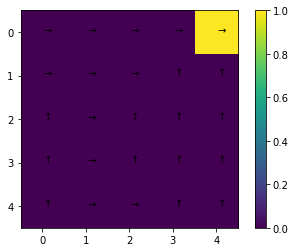

In [150]:
rows,columns,prob,discount,tol=5,5,0.8,0.9,1e-7
A,b,c,P_0=example(rows,columns,prob,discount,tol)
valit_val, bestAction = valitr(P_0, b, discount, tol) # Value Iteration
polyit_val, bestAction2,error = policyitr(P_0, b[0:P_0.shape[1]], discount, tol) # Policy Iteration
res = linprog(c, -A, -b, A_eq=None, b_eq=None, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
ecos_val=ECOS_Primal(A,b,c,P_0,tol) # ECOS Primal
scs_val=SCS_Primal(A,b,c,P_0,tol) # SCS Primal
cvxopt_val=CVXOPT_Primal(A,b,c,P_0,tol) # CVXOPT Primal
projgrad_val, projgrad_error, projgrad_iter = descent(graddes, "gradient", vals+100, A, b, 1, tol, valit_val) # Projected Gradient
accgrad_val, accgrad_error, accgrad_iter = descent(accelgrad, "accelerated", vals+100, A, b, 1e-1, tol, valit_val) # Accelerated Gradient Descent
interior_val, interior_error=interiorPoint(A, b, discount, tol, 0.01, valit_val) # Interior Point Method
plotGridWorld(b[0:P_0.shape[1]], bestAction2, rows, columns)


In [148]:
#finds another feasible point using the optimal solution
valsFeasible = polyit_val +1;
#finds analytical center
vals_analytical = findAnalyticCenter(A,b,valsFeasible,1000);
print(np.min(np.dot(A,vals_analytical)-b))
projgrad_val, projgrad_error, projgrad_iter = descent(graddes, "gradient", vals_analytical, A, b, 1, tol, valit_val) # Projected Gradient
accgrad_val, accgrad_error, accgrad_iter = descent(accelgrad, "accelerated", vals_analytical, A, b, 1, tol, valit_val, T = 10) # Accelerated Gradient Descent
print(projgrad_val)

0.0633940149557
[[ 3.9892686 ]
 [ 4.27339486]
 [ 4.68089128]
 [ 5.14291423]
 [ 5.56718529]
 [ 4.27545262]
 [ 4.60805877]
 [ 5.08252695]
 [ 5.62306434]
 [ 6.14954544]
 [ 4.68390263]
 [ 5.08619153]
 [ 5.64601766]
 [ 6.2843159 ]
 [ 6.92617588]
 [ 5.14186379]
 [ 5.62912687]
 [ 6.28261377]
 [ 7.04332178]
 [ 7.85415438]
 [ 5.57292957]
 [ 6.14429582]
 [ 6.92649722]
 [ 7.85195491]
 [ 8.9830694 ]]
